In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [4]:
import genesis as gs
# show the iamge
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [3]:
import random
import pathlib as pl
import numpy as np
import os, sys
import torch

USE_EEF = True
FINGERTIP_POS = -0.9
KINOVA_START_DOFS_POS = [0.3268500269015339, -1.4471734542578538, 2.3453266624159497, -1.3502152158191212, 2.209384006676201, -1.5125125137062945, -1, 1, FINGERTIP_POS, FINGERTIP_POS]


In [ ]:
gs.init(backend=gs.gpu, seed=random.randint(0, 2**30), precision="32", logging_level="warning")

In [ ]:
scene = gs.Scene(
            show_viewer=True,
        )

# path to current notebook
nb_path = os.path.abspath('nb.ipynb')
nb_path = pl.Path(nb_path)

kinova = scene.add_entity(
            gs.morphs.URDF(
                file=str(nb_path.parent / 'gen3_lite_2f_robotiq_85.urdf'),
                # file=str(pl.Path(__file__).parent / 'gen3_lite_2f_robotiq_85_with_camera.urdf'),
                fixed=True,
                convexify=True,
                pos=(0.0, 0.0, 0.055), # raise to account for table mount
            ),
            material=gs.materials.Rigid(friction=1.0),
            vis_mode="visual"

            # gs.morphs.MJCF(file="/home/j/workspace/genesis_pickaplace/005_tomato_soup_can/google_512k/kinbody.xml"),
        )


cam_0 = scene.add_camera(
    fov=45,
    GUI=True,
)


scene.build()


from kinova import JOINT_NAMES as kinova_joint_names, EEF_NAME as kinova_eef_name, TRIALS_POSITION_0, TRIALS_POSITION_1, TRIALS_POSITION_2
kdofs_idx = kdofs_idx = [kinova.get_joint(name).dof_idx_local for name in kinova_joint_names]
kinova.set_dofs_kp(
    kp             = 3*np.array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]),
    dofs_idx_local = kdofs_idx,
)
kinova.set_dofs_position(np.array(KINOVA_START_DOFS_POS), kdofs_idx)
scene.step()

In [ ]:
FINGERTIP_POS = -0.9
KINOVA_START_DOFS_POS = [0.3268500269015339, -1.4471734542578538, 2.3453266624159497, -1.3502152158191212, 2.209384006676201, -1.5125125137062945, -1, 1, FINGERTIP_POS, FINGERTIP_POS]
kinova.set_dofs_position(np.array(KINOVA_START_DOFS_POS), kdofs_idx)
scene.step()

def update_camera_position():
    wrist = kinova.get_link('end_effector_link')
    wrist_pos_offset = torch.Tensor([0.0, 0.0, 0.02]).to(device=wrist.get_pos().device)
    # Update the camera position based on the end effector position
    wrist_pos = wrist.get_pos()
    position = wrist.get_pos() + wrist_pos_offset
    rotation = wrist.get_ang()

    # get the mean position of the two fingertips
    left_fingertip = kinova.get_link('left_finger_dist_link')
    right_fingertip = kinova.get_link('right_finger_dist_link')
    middle = (left_fingertip.get_pos() + right_fingertip.get_pos()) / 2 + wrist_pos_offset

    # make a 4x4 transform out of the wrist position and rotation
    print(position.shape, rotation.shape)
    quat = gs.utils.geom.euler_to_quat(rotation)
    new_pos = gs.utils.geom.transform_by_quat(position, quat)


    cam_0.set_pose(pos=new_pos.cpu().numpy(), lookat=middle.cpu().numpy(), up=rotation.cpu().numpy())
    # cam_0.set_pose(pos=position.cpu().numpy(), lookat=middle.cpu().numpy(), up=(0, 0, 1))
update_camera_position()
img = cam_0.render(rgb=True, depth=False, segmentation=False, normal=False, use_imshow=False)[0]
imgplot = plt.imshow(img)

In [5]:
from genesis_sim2real.envs.demo_holder import GenesisDemoHolder
demo_holder = GenesisDemoHolder(use_eef=USE_EEF, subsample_ratio=2)


/home/j/workspace/fastrl/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/j/workspace/fastrl/venv/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Loaded 96 demos from /home/j/workspace/genesis_sim2real/inthewild_trials_eef
235 (442, 7) -- 310 (917, 7) -- 317 (723, 7) -- 326 (483, 7) -- 304 (1040, 7) -- 287 (2309, 7) -- 293 (3071, 7) -- 302 (582, 7) -- 325 (730, 7) -- 311 (650, 7) -- 281 (520, 7) -- 274 (944, 7) -- 278 (334, 7) -- 289 (301, 7) -- 286 (1876, 7) -- 233 (463, 7) -- 328 (1383, 7) -- 255 (687, 7) -- 246 (1311, 7) -- 273 (734, 7) -- 236 (339, 7) -- 266 (895, 7) -- 313 (747, 7) -- 280 (362, 7) -- 327 (687, 7) -- 334 (572, 7) -- 268 (2538, 7) -- 301 (826, 7) -- 240 (772, 7) -- 250 (1675, 7) -- 298 (521, 7) -- 309 (877, 7) -- 248 (1531, 7) -- 315 (1945, 7) -- 303 (1152, 7) -- 269 (2428, 7) -- 284 (657, 7) -- 262 (468, 7) -- 238 (1275, 7) -- 277 (427, 7) -- 324 (324, 7) -- 259 (604, 7) -- 330 (1335, 7) -- 283 (660, 7) -- 275 (722, 7) -- 299 (1306, 7) -- 257 (504, 7) -- 251 (792, 7) -- 331 (1434, 7) -- 318 (759, 7) -- 307 (943, 7) -- 237 (401, 7) -- 279 (1000, 7) -- 254 (807, 7) -- 261 (706, 7) -- 314 (650, 7) -- 316 (940, 

In [ ]:

if '_eef' not in str(demo_holder.dir):
    genesis_arm = kinova
    output_dir='./inthewild_trials_eef'
    output_dir = pl.Path(output_dir)
    new_demos = []
    for idx, (trial_id, d) in enumerate(demo_holder.demos):
        # if trial_id != 235: continue
        new_d = []
        for i in range(d.shape[0]): # for each joint position action [j0, j1, j2, j3, j4, j5, gripper]
            joint_pos_theta = d[i, :6]
            joint_pos, joint_quat = genesis_arm.forward_kinematics(torch.tensor(joint_pos_theta))
            eef_pos = joint_pos[6].cpu().numpy(); eef_quat = joint_quat[6].cpu().numpy()
            eef_euler = gs.utils.geom.quat_to_xyz(eef_quat)
            
            action = np.concatenate((eef_pos, eef_euler, d[i, 6:]), axis=-1)
            # print(', '.join([f'{x:+.1f}' for x in action]), '||', ', '.join([f'{x:+.1f}' for x in d[i, :]]))
            new_d.append(action)

        # save the demo out
        output_path = output_dir / f'{trial_id}_episodes.npy'
        # make the new directory if it doesn't exist
        output_path.parent.mkdir(parents=True, exist_ok=True)
        np.save(output_path, new_d)

In [ ]:
cam_0.set_pose(pos=(0.3, 0.6, 0.5), lookat=(0.5 ,0.0, 0.1), up=(0, 0, 1))
img = cam_0.render(rgb=True, depth=False, segmentation=False, normal=False, use_imshow=False)[0]
imgplot = plt.imshow(img)

In [ ]:
# print out the link names
print([l.name for l in kinova._links])

In [ ]:

FINGERTIP_POS = -0.9

KINOVA_START_DOFS_POS = [0.3268500269015339, -1.4471734542578538, 2.3453266624159497, -1.3502152158191212, 2.209384006676201, -1.5125125137062945, -1, 1, FINGERTIP_POS, FINGERTIP_POS]
def reset_arm_pose():    
    kinova.set_dofs_position(np.array(KINOVA_START_DOFS_POS), kdofs_idx)
    scene.step()

# demo_holder.next_demo()
demo_holder.reset_current_demo()

In [ ]:

print(f'{USE_EEF=}')
demo_holder.reset_current_demo()

reset_arm_pose()

from genesis.utils.geom import quat_to_xyz
next_joint_pos = demo_holder.next_action()['action']
eef_joint = kinova.get_link('end_effector_link')

current_eef_pos = kinova.get_link('end_effector_link').get_pos()
current_eef_euler = gs.utils.geom.quat_to_xyz(kinova.get_link('end_effector_link').get_quat())
# scene.clear_debug_objects()
# if next_joint_pos is not None:
while next_joint_pos is not None:
    # calculate the eef position given the eef joint position

    if USE_EEF:
        eef_pos, eef_euler, gripper_pos = next_joint_pos[:3], next_joint_pos[3:6], next_joint_pos[6:]

        deef_pos = np.array(eef_pos) - current_eef_pos.cpu().numpy()
        deef_euler = eef_euler - current_eef_euler.cpu().numpy()


        # get current end effector euler
        eef_link = kinova.get_link('end_effector_link')
        curr_eef_euler = gs.utils.geom.quat_to_xyz(eef_link.get_quat()).cpu().numpy()

        eef_action = np.concatenate((eef_pos, eef_euler, gripper_pos), axis=-1)
        # convert euler to quat


        # eef_quat = gs.utils.geom.xyz_to_quat(np.array([eef_euler[0], curr_eef_euler[1], curr_eef_euler[2]]))
        # eef_quat = gs.utils.geom.xyz_to_quat(np.array([curr_eef_euler[0], eef_euler[1], curr_eef_euler[2]]))
        # eef_quat = gs.utils.geom.xyz_to_quat(np.array([curr_eef_euler[0], curr_eef_euler[1], eef_euler[2]]))
        eef_quat = gs.utils.geom.xyz_to_quat(eef_euler)
        # print(', '.join(f'{x:+.1f}' for x in eef_euler))

        # get the joint positions that correspond to the new wrist position
        ik_joints = kinova.inverse_kinematics(eef_link, pos=eef_pos, quat=eef_quat, rot_mask=[False, False, True])
        
        print(', '.join(f'{x:+.1f}' for x in eef_action), '||', ', '.join(f'{x:+.1f}' for x in ik_joints))
        cmd = ik_joints[:-4]
    else:
        arm_pos, gripper_pos = next_joint_pos[:6], next_joint_pos[6:]
        # print(', '.join(f'{x:+.2f}' for x in arm_pos), ' gripper ', ', '.join(f'{x:.1f}' for x in gripper_pos))
        
        # get the current joint positions
        current_joint_pos = kinova.get_dofs_position(kdofs_idx)
        # print(', '.join(f'{x:+.2f}' for x in current_joint_pos))

        d = np.linalg.norm(np.array(arm_pos) - current_joint_pos[:-4].cpu().numpy())
        # print(f'---{d=:.2f}---')

        cmd = arm_pos # Use the arm position command directly
        if True: # from the arm position, calculate the eef_position, then convert that back to joint angles to test eef control
            joint_pos, joint_quat = kinova.forward_kinematics(torch.tensor(next_joint_pos))
            
            eef_pos, eef_quat = joint_pos[6], joint_quat[6]

            # convert quat to euler
            eef_xyz = quat_to_xyz(eef_quat.cpu().numpy())
            eef_quat = gs.utils.geom.xyz_to_quat(eef_xyz)

            tmp = np.concatenate((eef_pos.cpu().numpy(), eef_xyz, gripper_pos))
            # print(tmp[6:])
            
            # for pos in joint_pos:
            #     scene.draw_debug_sphere(pos, 0.01, color=(1, 0, 0))

            eef_action = np.concatenate((eef_pos.cpu().numpy(), eef_xyz, gripper_pos), axis=-1)

            ik_joints = kinova.inverse_kinematics(kinova.get_link('end_effector_link'), pos=eef_pos, quat=eef_quat, rot_mask=[True, True, True])
            print(', '.join(f'{x:+.1f}' for x in eef_action), '||', ', '.join(f'{x:+.1f}' for x in ik_joints))
            
            cmd = ik_joints[:-4]

    kinova.control_dofs_position(cmd, kdofs_idx[:-4])    
    # kinova.set_dofs_position(cmd, kdofs_idx[:-4])
    # update_camera_position()
    scene.step()
    
    current_eef_pos = kinova.get_link('end_effector_link').get_pos()
    current_eef_euler = gs.utils.geom.quat_to_xyz(kinova.get_link('end_effector_link').get_quat())

    # display the image
    # img = cam_0.render(rgb=True, depth=False, segmentation=False, normal=False, use_imshow=False)[0]
    # imgplot = plt.imshow(img)
    # plt.show(block=False)

    next_joint_pos = demo_holder.next_action()
    next_joint_pos = next_joint_pos['action'] if next_joint_pos is not None else None

else:
    print(f'No more actions')




In [6]:
demo_holder = GenesisDemoHolder(use_eef=USE_EEF, subsample_ratio=2)

demo_holder.reset_current_demo()
diff_eef_demo = demo_holder.convert_eef_to_diff_eef()
reset_arm_pose()
for _ in range(100):
    kinova.control_dofs_position(np.array(KINOVA_START_DOFS_POS), kdofs_idx)
    scene.step()


Loaded 96 demos from /home/j/workspace/genesis_sim2real/inthewild_trials_eef
235 (442, 7) -- 310 (917, 7) -- 317 (723, 7) -- 326 (483, 7) -- 304 (1040, 7) -- 287 (2309, 7) -- 293 (3071, 7) -- 302 (582, 7) -- 325 (730, 7) -- 311 (650, 7) -- 281 (520, 7) -- 274 (944, 7) -- 278 (334, 7) -- 289 (301, 7) -- 286 (1876, 7) -- 233 (463, 7) -- 328 (1383, 7) -- 255 (687, 7) -- 246 (1311, 7) -- 273 (734, 7) -- 236 (339, 7) -- 266 (895, 7) -- 313 (747, 7) -- 280 (362, 7) -- 327 (687, 7) -- 334 (572, 7) -- 268 (2538, 7) -- 301 (826, 7) -- 240 (772, 7) -- 250 (1675, 7) -- 298 (521, 7) -- 309 (877, 7) -- 248 (1531, 7) -- 315 (1945, 7) -- 303 (1152, 7) -- 269 (2428, 7) -- 284 (657, 7) -- 262 (468, 7) -- 238 (1275, 7) -- 277 (427, 7) -- 324 (324, 7) -- 259 (604, 7) -- 330 (1335, 7) -- 283 (660, 7) -- 275 (722, 7) -- 299 (1306, 7) -- 257 (504, 7) -- 251 (792, 7) -- 331 (1434, 7) -- 318 (759, 7) -- 307 (943, 7) -- 237 (401, 7) -- 279 (1000, 7) -- 254 (807, 7) -- 261 (706, 7) -- 314 (650, 7) -- 316 (940, 

NameError: name 'reset_arm_pose' is not defined

In [ ]:
scene.clear_debug_objects()
reset_arm_pose()

target_eef_pos, target_eef_quat = kinova.forward_kinematics(torch.tensor(KINOVA_START_DOFS_POS))
target_eef_euler = gs.utils.geom.quat_to_xyz(target_eef_quat[6]).cpu().numpy()
target_eef_pos = target_eef_pos[6].cpu().numpy()

eef_link = kinova.get_link('end_effector_link')
target_eef_pos = eef_link.get_pos().cpu().numpy()
target_eef_euler = gs.utils.geom.quat_to_xyz(eef_link.get_quat()).cpu().numpy()

# make a debug sphere at the target eef position
# scene.draw_debug_sphere(target_eef_pos, 0.01, color=(1, 0, 0))
# scene.draw_debug_sphere(eef_pos, 0.01, color=(0, 1, 0))
# scene.draw_debug_sphere(demo_holder.demos[demo_holder.idx][1][0, :3], 0.05, color=(0, 0, 1))



for idx, daction in enumerate(diff_eef_demo):
    print(f'{idx=}: ', end=' ')
    print(', '.join(f'{x:+.5f}' for x in daction))

    # get the current end effector pose
    eef_link = kinova.get_link('end_effector_link')


    prev_original = demo_holder.demos[demo_holder.idx][1][idx]
    original = demo_holder.demos[demo_holder.idx][1][idx+1]
    recalc_diff = original - prev_original

    # for o, t in zip(prev_original, np.concatenate((target_eef_pos, target_eef_euler))):
    #     print(f'\t{o:+.2f} --> {t:+.2f}')

    # print the difference between the original demo and the diff_eef
    # print(f'recalc diff {np.linalg.norm(daction - recalc_diff):.10f}. arm pose diff {np.linalg.norm(prev_original[:6] - np.concatenate((target_eef_pos, target_eef_euler))):.10f}')

    # get the new end effector pose

    target_eef_pos = target_eef_pos + daction[:3] #[0.0, 0.0, 0.0]
    scene.draw_debug_sphere(target_eef_pos, 0.01, color=(1, 0, 0))
    # new_eef_pos = curr_eef_pos + daction[:3]
    # print out the old and new eef positions
    # print('POS: ', ', '.join(f'{x:+.5f}' for x in curr_eef_pos), ' --> ', ', '.join(f'{x:+.5f}' for x in new_eef_pos))

    target_eef_euler = target_eef_euler + daction[3:6]
    # new_eef_euler = curr_eef_euler + daction[3:6]
    # print('EULER: ', ', '.join(f'{x:+.5f}' for x in curr_eef_euler), ' --> ', ', '.join(f'{x:+.5f}' for x in new_eef_euler))

    # what's the differnece between the original demo and the original demo + diff_eef?
    # print('POS DIFF: ', np.linalg.norm(original[:3] - target_eef_pos), ' EULER DIFF: ', np.linalg.norm(original[3:6] - target_eef_euler))

    target_eef_quat = gs.utils.geom.xyz_to_quat(target_eef_euler)

    # get the joint positions that correspond to the new wrist position
    ik_joints = kinova.inverse_kinematics(eef_link, pos=target_eef_pos, quat=target_eef_quat, rot_mask=[True, True, True])
    # ik_joints = kinova.inverse_kinematics(eef_link, pos=curr_eef_pos, quat=curr_eef_euler, rot_mask=[True, True, True])

    
    # print out the new joint positions
    # print(', '.join(f'{x:+.5f}' for x in ik_joints))

    kinova.control_dofs_position(ik_joints[:-4], kdofs_idx[:-4])
    # kinova.control_dofs_position(KINOVA_START_DOFS_POS, kdofs_idx)

    # for _ in range(10):
    scene.step()
    curr_eef_euler = gs.utils.geom.quat_to_xyz(eef_link.get_quat()).cpu().numpy()
    curr_eef_pos = eef_link.get_pos().cpu().numpy()
    if idx > 150: break


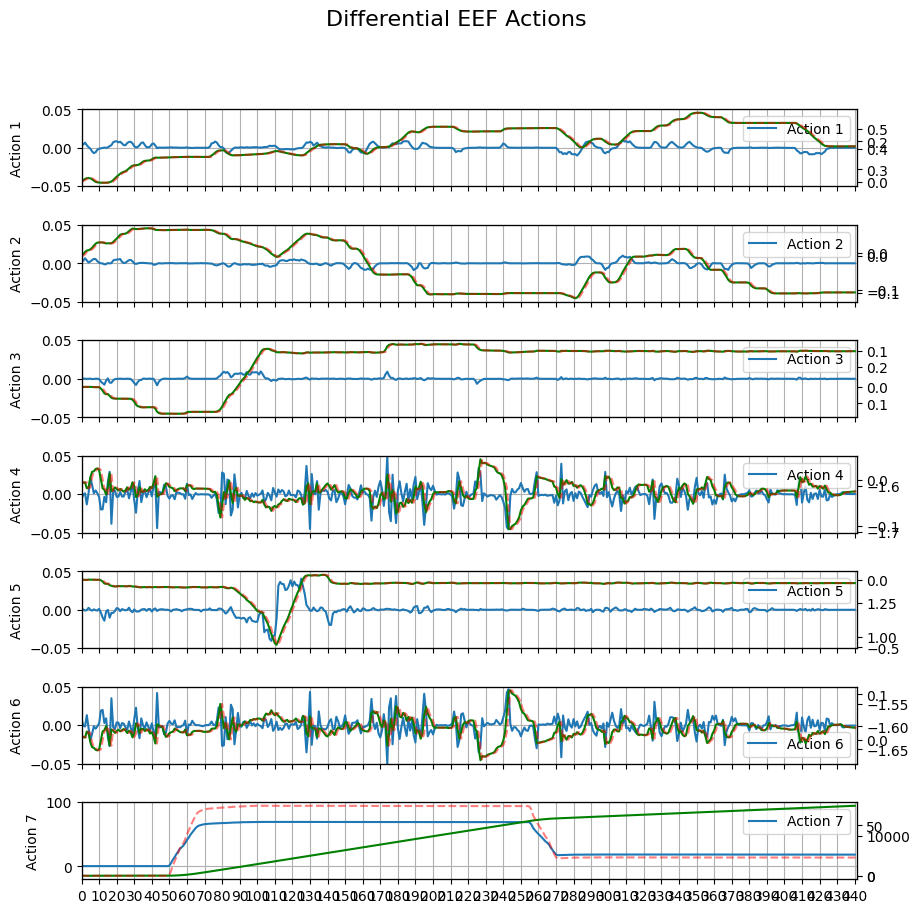

In [10]:

# plot the differential eef actions. One plot for each axis
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

daction = diff_eef_demo[0]
fig, axs = plt.subplots(len(daction), 1, figsize=(10, 10), sharex=True)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Differential EEF Actions', fontsize=16)

for i in range(len(daction)):
    # plot the i-th action
    axs[i].plot(diff_eef_demo[:, i], label=f'Action {i+1}')
    axs[i].set_ylabel(f'Action {i+1}')
    axs[i].legend()
    axs[i].grid()
    if i < 3:
        axs[i].set_ylim(-0.01, 0.01)
    if i < 6:
        axs[i].set_ylim(-0.05, 0.05)
    else:
        axs[i].set_ylim(-20, 100)
    axs[i].set_xlim(0, len(diff_eef_demo))
    axs[i].xaxis.set_major_locator(ticker.MultipleLocator(10))

    # on the twincx axis, plot the cumulative sum of the differential actions
    axs[i].twinx().plot(np.cumsum(diff_eef_demo[:, i]), label=f'Cumulative Action {i+1}', color='g')

    # on the twinx axis, plot the original demo
    axs[i].twinx().plot(demo_holder.demos[0][1][:, i], label=f'Original Action {i+1}', color='r', alpha=0.5, linestyle='--')

    # axs[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
